In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from main import *
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("data/LS.h5ad")
ada

AnnData object with n_obs × n_vars = 5011 × 17328
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [4]:
data = scipy.sparse.csr_matrix.toarray(ada.X)
counts = np.asarray(np.expm1(data), dtype=int)
ada.layers['raw'] = counts
ada.layers['log1p'] = data

In [5]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw', 'log1p'

## create a Xct_metrics obj:

In [6]:
skin = Xct_metrics(ada)
type(skin)

main.Xct_metrics

In [7]:
skin.DB.head()

,ligand,receptor
0,BDNF,TRPC1
1,CXCL12,GNAI2
2,PF4,GNAI2
3,EPOR,TRPC3
4,EPOR,EPO


In [8]:
skin._genes_index_DB

array([[1194,    0],
       [2920,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

In [9]:
ada.var_names[1194-1] #check

'BDNF'

918 (intervals for fit) / 3000 (filtered -Inf) / 3000 (original) features for the fit


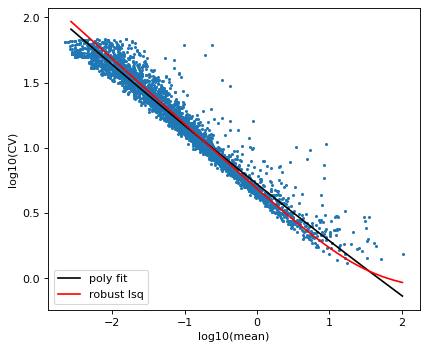

array([ 0.048889  , -0.07626458, -0.02784309, ...,  0.78019458,
        0.59314723,  0.22144539])

In [10]:
skin.chen2016_fit(ada, plot = True, verbose = True)

## create a Xct obj with GRN building:

In [11]:
obj1 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'full', verbose = True)

print(obj1)

initiating an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
GRNs loaded...
correspondence has been built...
Xct object with the interaction between cells Inflam. FIB X Inflam. DC = 484 X 81
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [12]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.029522,0.024446,0.067410,0.027285,2.283343,1.116142,8.794479,6.757026,0.156436,-0.338065
28,AREG,NTRK2,0.003443,0.024446,0.005726,0.027285,1.663072,1.116142,21.977261,6.757026,-0.221117,-0.338065
33,FGF2,NTRK2,0.076530,0.024446,0.142827,0.027285,1.866276,1.116142,4.938230,6.757026,-0.075862,-0.338065
35,FGF7,NTRK2,0.449156,0.024446,0.835224,0.027285,1.859543,1.116142,2.034720,6.757026,0.023099,-0.338065
53,BDNF,NTRK2,0.009386,0.024446,0.016305,0.027285,1.737234,1.116142,13.604940,6.757026,-0.094830,-0.338065
...,...,...,...,...,...,...,...,...,...,...,...,...
7884,LAMB1,SV2B,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
7890,LAMC3,SV2B,0.343355,0.015761,0.610706,0.019873,1.778645,1.260899,2.276004,8.944272,-0.046932,-0.338065
7894,LAMB2,SV2B,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065
8023,FSTL1,DIP2A,1.154967,0.066773,1.490066,0.086209,1.290138,1.291068,1.056898,4.397163,0.014484,-0.313400


In [13]:
df1[df1.ligand == 'CCL19']

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
4715,CCL19,CCR6,1.738264,0.165172,5.539186,0.257821,3.186619,1.560922,1.353964,3.074128,0.660159,-0.038730
4766,CCL19,CXCR4,1.738264,1.356051,5.539186,1.514930,3.186619,1.117163,1.353964,0.907654,0.660159,-0.035804
4859,CCL19,CCR7,1.738264,1.688513,5.539186,1.941579,3.186619,1.149875,1.353964,0.825226,0.660159,-0.005376


In [14]:
df1[df1.ligand == 'CXCL12']

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
4714,CXCL12,CCR6,1.425765,0.165172,2.725718,0.257821,1.911759,1.560922,1.157958,3.074128,0.295925,-0.038730
4765,CXCL12,CXCR4,1.425765,1.356051,2.725718,1.514930,1.911759,1.117163,1.157958,0.907654,0.295925,-0.035804
4858,CXCL12,CCR7,1.425765,1.688513,2.725718,1.941579,1.911759,1.149875,1.157958,0.825226,0.295925,-0.005376


## permutation mode:

In [15]:
# np.random.seed(1)

# orig_score = np.asarray(obj1.score(method=1))
# pmt_scores = scores(ada, obj1, method = 1, a = 0.8, n = 100)

# enriched, pvals, counts = pmt_test(orig_score, pmt_scores)
# #enriched, counts

# df_enriched = df1.iloc[enriched, :]
# print('Total enriched:', len(df_enriched))
# df_enriched

## mode 'full':

In [16]:
obj1._net_A.shape, obj1._net_B.shape, obj1._w.shape #check

((3000, 3000), (3000, 3000), (6000, 6000))

In [17]:
w12 = obj1._w[:obj1._net_A.shape[0], obj1._net_A.shape[1]:]

np.mean(w12)  

1.0002169791476756

In [18]:
#selected LR pairs
candidates = obj1._candidates(df1)
print(len(candidates))
candidates[:5]

160


['IGF1_NTRK2', 'AREG_NTRK2', 'FGF2_NTRK2', 'FGF7_NTRK2', 'BDNF_NTRK2']

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 5423.125
99 602.3767700195312
199 534.5269165039062
299 498.17755126953125
399 481.08807373046875
499 473.42510986328125
599 469.24267578125
699 466.740966796875
799 465.18585205078125
899 464.21026611328125
999 463.5728454589844
1099 463.1387939453125
1199 462.8210144042969
1299 462.59075927734375
1399 462.42950439453125
1499 462.2760009765625
1599 462.17584228515625
1699 462.0816650390625
1799 462.0118713378906
1899 461.9502258300781
1999 461.90234375
2099 461.85675048828125
2199 461.8200988769531
2299 461.78948974609375
2399 461.7627868652344
2499 461.735595703125
2599 461.72039794921875
2

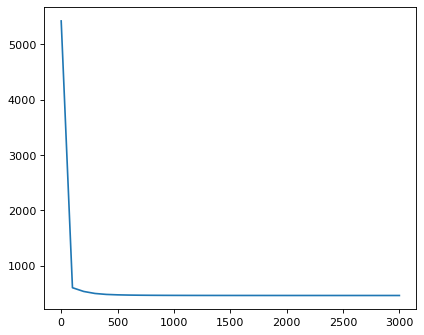

In [19]:
projections, losses = obj1.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [20]:
# np.savetxt("./data/skin_projections_pair.csv", projections, delimiter="\t")

# projections = np.genfromtxt("./data/skin_projections_pair.csv", delimiter="\t")

In [21]:
df_nn = obj1.nn_output(projections)
df_nn.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
COL5A1_SRGN,"(992, 2675)",0.000003,1,220.658339
CD81_ADAM19,"(178, 897)",0.000004,2,173.541531
CALD1_TXNIP,"(2701, 744)",0.000004,3,183.475914
RGCC_NFKBIA,"(1618, 1740)",0.000004,4,195.438064
PLA2G2A_CD83,"(2974, 1614)",0.000004,5,163.549170


In [22]:
#df_nn_to_output = df_nn.iloc[:1000, :]
#df_nn_to_output.to_csv('distances_nn.csv')

[[ 1.         -0.16347426]
 [-0.16347426  1.        ]]


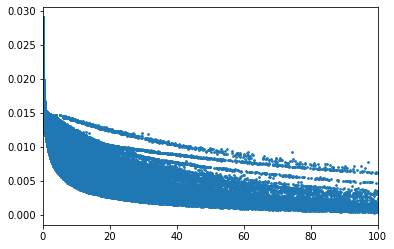

In [23]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [24]:
# df_nn_filtered = df_nn.loc[candidates]
# len(df_nn_filtered)

In [25]:
df_nn_filtered = obj1.filtered_nn_output(df_nn, candidates)
df_nn_filtered.head()

manifold aligned # of L-R pairs: 160


,idx,dist,rank,correspondence_score,rank_filtered
VCAM1_ITGB2,"(1458, 491)",0.000437,7144,106.982370,1
CXCL12_CXCR4,"(2919, 2548)",0.000835,13902,536.626422,2
CCL2_CXCR4,"(2820, 2548)",0.000843,14014,540.281406,3
CXCL12_CCR7,"(2919, 2138)",0.000927,15127,802.241724,4
CCL2_CCR7,"(2820, 2138)",0.000935,15218,807.705825,5


In [26]:
df_enriched = obj1.chi2_test(df_nn_filtered, df = 2, pval = 0.05, FDR=True)
df_enriched


Total enriched: 12 / 160


,idx,dist,rank,correspondence_score,rank_filtered,q_val
VCAM1_ITGB2,"(1458, 491)",0.000437,7144,106.982370,1,0.034388
CXCL12_CXCR4,"(2919, 2548)",0.000835,13902,536.626422,2,0.034388
CCL2_CXCR4,"(2820, 2548)",0.000843,14014,540.281406,3,0.034388
CXCL12_CCR7,"(2919, 2138)",0.000927,15127,802.241724,4,0.034388
CCL2_CCR7,"(2820, 2138)",0.000935,15218,807.705825,5,0.034388
CXCL14_CXCR4,"(2994, 2548)",0.000968,15622,862.240276,6,0.034388
CCL2_TNF,"(2820, 2815)",0.001042,16538,159.410090,7,0.034388
CXCL14_CCR7,"(2994, 2138)",0.001060,16739,1289.025469,8,0.034388
CXCL1_CCR7,"(2596, 2138)",0.001086,17064,107.058778,9,0.034388
CCL19_CXCR4,"(2993, 2548)",0.001103,17219,1964.685417,10,0.034388


In [27]:
df_nn_filtered.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                        0.001195
rank                           18200
correspondence_score     2937.150598
rank_filtered                     12
p_val                       0.034388
Name: CCL19_CCR7, dtype: object

In [28]:
# i = 0 
# for p in candidates:
#     if df_nn.loc[p].values[2] < 200: #rank < ?
#         i += 1
#         print(p, "idx, dist, rank, score, rank%:", ' '.join(map(str, df_nn.loc[p].values)), f'{round(100* df_nn.loc[p].values[2]/len(df_nn), 5)}%')

# print('\nTotal enriched:', i)

## mode 'comb':

In [29]:
obj2 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'comb', verbose = True)

initiating an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
GRNs loaded...
correspondence has been built...


In [30]:
w12 = obj2._w[:obj2._net_A.shape[0], obj2._net_A.shape[1]:]

np.mean(w12)  

0.024279120407368276

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 122.20376586914062
99 36.462127685546875
199 32.662776947021484
299 28.188762664794922
399 26.78423500061035
499 26.054107666015625
599 25.80288314819336
699 25.4305419921875
799 25.46610450744629
899 25.070537567138672
999 24.97801971435547


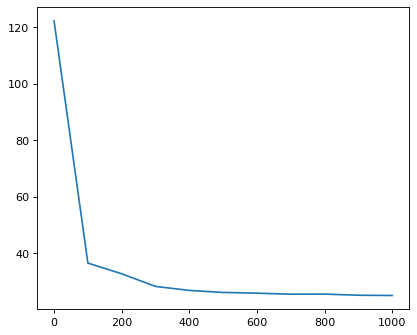

In [31]:
projections2, losses2 = obj2.nn_projection(n = 1000, plot_loss = True)

In [32]:
# np.savetxt("./data/skin_projections_comb.csv", projections2, delimiter="\t")

# projections2 = np.genfromtxt("./data/skin_projections_comb.csv", delimiter="\t")

In [33]:
df_nn2 = obj2.nn_output(projections2)
df_nn2.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
CXCL14_HLA-DPA1,"(2994, 2987)",0.000007,1,1669.730279
CXCL14_HLA-DPB1,"(2994, 2983)",0.000056,2,1666.246155
CCL19_CD1A,"(2993, 1668)",0.000136,3,1978.265143
CCL19_CXCR4,"(2993, 2548)",0.000159,4,1964.685417
CCL19_CD83,"(2993, 1614)",0.000256,5,2310.091743


[[ 1.         -0.33741998]
 [-0.33741998  1.        ]]


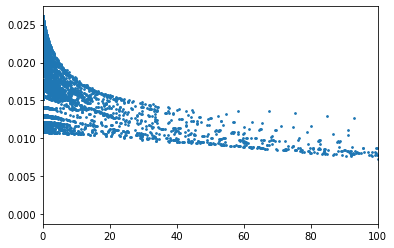

In [34]:
#check corr
select = df_nn2['correspondence_score'] != 0
nX = np.asarray(df_nn2['correspondence_score'][select])
nY = np.asarray(df_nn2['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [35]:
#df_nn_to_output2 = df_nn2.iloc[:1000, :]
#df_nn_to_output2.to_csv('distances_nn2.csv')

In [36]:
df_nn_filtered2 = obj2.filtered_nn_output(df_nn2, candidates)
df_nn_filtered2.head()

manifold aligned # of L-R pairs: 160


,idx,dist,rank,correspondence_score,rank_filtered
CCL19_CXCR4,"(2993, 2548)",0.000159,4,1964.685417,1
CXCL14_CCR7,"(2994, 2138)",0.000452,8,1289.025469,2
CCL19_CCR7,"(2993, 2138)",0.000726,13,2937.150598,3
CXCL14_CXCR4,"(2994, 2548)",0.001337,34,862.240276,4
CCL2_CCR7,"(2820, 2138)",0.001463,38,807.705825,5


In [37]:
df_enriched2 = obj2.chi2_test(df_nn_filtered2, df = 2, pval=0.05)
df_enriched2


Total enriched: 8 / 160


,idx,dist,rank,correspondence_score,rank_filtered,p_val
CCL19_CXCR4,"(2993, 2548)",0.000159,4,1964.685417,1,0.000034
CXCL14_CCR7,"(2994, 2138)",0.000452,8,1289.025469,2,0.000277
CCL19_CCR7,"(2993, 2138)",0.000726,13,2937.150598,3,0.000714
CXCL14_CXCR4,"(2994, 2548)",0.001337,34,862.240276,4,0.002419
CCL2_CCR7,"(2820, 2138)",0.001463,38,807.705825,5,0.002897
CXCL12_CCR7,"(2919, 2138)",0.001497,40,802.241724,6,0.003032
CCL2_CXCR4,"(2820, 2548)",0.002347,76,540.281406,7,0.007443
CXCL12_CXCR4,"(2919, 2548)",0.002381,78,536.626422,8,0.007659


## mode pairs:

In [38]:
obj3 = Xct(ada, 'Inflam. FIB', 'Inflam. DC', build_GRN = False, pcNet_name = 'skin_net', mode = 'pairs', verbose = True)

initiating an Xct object for interactions from Inflam. FIB (484) to Inflam. DC (81)...
GRNs loaded...
correspondence has been built...


In [39]:
w12 = obj1._w[:obj3._net_A.shape[0], obj3._net_A.shape[1]:]

np.mean(w12)  

1.0002169791476756

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 91.05137634277344
99 27.237743377685547
199 23.574460983276367
299 21.075862884521484
399 20.339221954345703
499 20.182231903076172
599 19.630210876464844
699 19.41043472290039
799 19.323551177978516
899 19.183713912963867
999 19.173681259155273


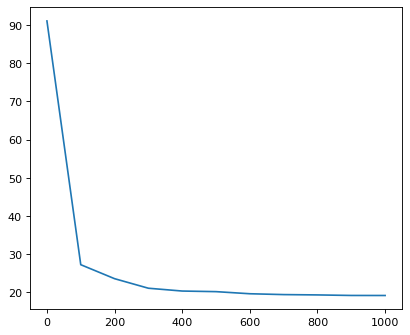

In [40]:
projections3, losses3 = obj3.nn_projection(n = 1000, plot_loss = True)

In [41]:
# np.savetxt("./data/skin_projections_all.csv", projections3, delimiter="\t")

# projections3 = np.genfromtxt("./data/skin_projections_all.csv", delimiter="\t")

In [42]:
df_nn3 = obj3.nn_output(projections3)
df_nn3.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
APOE_HLA-DPA1,"(2975, 2987)",0.000027,1,1301.987254
POSTN_HLA-DPB1,"(2977, 2983)",0.000044,2,1363.317986
POSTN_HLA-DPA1,"(2977, 2987)",0.000051,3,1366.168687
APOE_HLA-DPB1,"(2975, 2983)",0.000056,4,1299.270477
CCL19_CD1A,"(2993, 1668)",0.000096,5,1978.265143


[[ 1.         -0.35496395]
 [-0.35496395  1.        ]]


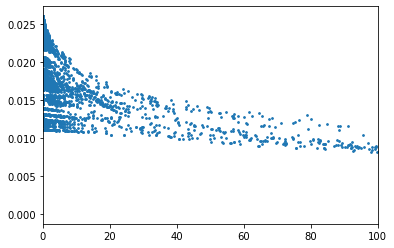

In [43]:
#check corr
select = df_nn3['correspondence_score'] != 0
nX = np.asarray(df_nn3['correspondence_score'][select])
nY = np.asarray(df_nn3['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [44]:
#df_nn_to_output3 = df_nn3.iloc[:20000, :]
#df_nn_to_output3.to_csv('distances_nn3.csv')

In [45]:
df_nn_filtered3 = obj3.filtered_nn_output(df_nn3, candidates)
df_nn_filtered3.head()

manifold aligned # of L-R pairs: 160


,idx,dist,rank,correspondence_score,rank_filtered
CCL19_CXCR4,"(2993, 2548)",0.000115,6,1964.685417,1
CXCL14_CCR7,"(2994, 2138)",0.000550,12,1289.025469,2
CCL19_CCR7,"(2993, 2138)",0.001159,25,2937.150598,3
CCL2_CCR7,"(2820, 2138)",0.001532,32,807.705825,4
CXCL14_CXCR4,"(2994, 2548)",0.001595,34,862.240276,5


In [46]:
df_enriched3 = obj3.chi2_test(df_nn_filtered3, df = 2, pval = 0.05)
df_enriched3


Total enriched: 8 / 160


,idx,dist,rank,correspondence_score,rank_filtered,p_val
CCL19_CXCR4,"(2993, 2548)",0.000115,6,1964.685417,1,0.000017
CXCL14_CCR7,"(2994, 2138)",0.000550,12,1289.025469,2,0.000393
CCL19_CCR7,"(2993, 2138)",0.001159,25,2937.150598,3,0.001742
CCL2_CCR7,"(2820, 2138)",0.001532,32,807.705825,4,0.003041
CXCL14_CXCR4,"(2994, 2548)",0.001595,34,862.240276,5,0.003294
CXCL12_CCR7,"(2919, 2138)",0.001622,37,802.241724,6,0.003410
CCL2_CXCR4,"(2820, 2548)",0.002577,73,540.281406,7,0.008579
CXCL12_CXCR4,"(2919, 2548)",0.002667,75,536.626422,8,0.009188
